##**1. Data Collection & Preparation**

###**Import Library & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("C:\\Users\\daffa\\Downloads\\tweet.csv")

###**Process EDA**

In [3]:
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib..."
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik...."
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p..."
4,4,negatif,Negara kita ngutang buat bngun infrastruktur y...


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1815 non-null   int64 
 1   sentimen    1815 non-null   object
 2   tweet       1815 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.7+ KB


###**Cek jumlah kalimat yang masuk ke masing-masing label**

In [5]:
df["sentimen"].value_counts()

sentimen
positif    612
netral     607
negatif    596
Name: count, dtype: int64

###**Visualisasi jumlah dari masing-masing label**

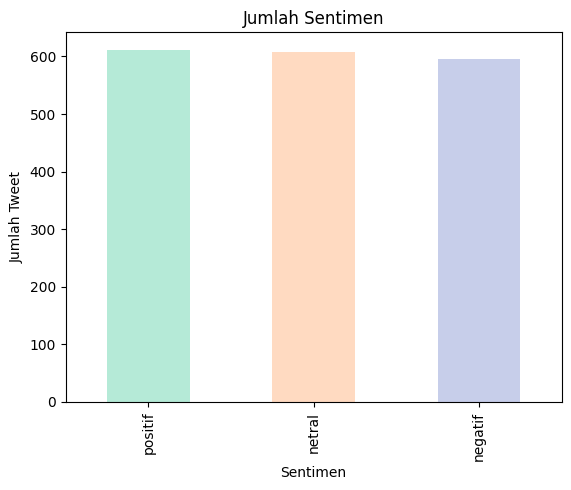

In [6]:
df["sentimen"].value_counts().plot(kind="bar", color=["#B5EAD7", "#FFDAC1", "#C7CEEA"])
plt.title("Jumlah Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()

In [7]:
df.isnull().sum()

Unnamed: 0    0
sentimen      0
tweet         0
dtype: int64

In [8]:
df[df.duplicated()]

,Unnamed: 0,sentimen,tweet


##**2. Text Preprocessing** - **Data Cleaning**

Tahap prepocessing terhadap dataset yang diambil dari platform media sosial (terutama Twitter) dilakukan secara hati-hati dan mendetail.
Hal ini dikarenakan:

1. Platform media sosial membuat user bisa lebih banyak berekspresi secara bebas.

2. Penggunaan gaya bahasa yang didalamnya banyak slang, bahasa campuran Indonesia-Inggris (atau campur bahasa daerah), spam penggunaan emoji, tanda baca yang tidak fungsional yang merepresentasikan dari gaya mengetik individual masing-masing user.

3. Emoticon/ emoji merepresentasikan isi hati user saat berinteraksi dengan user lainnya di media sosial.
Terlebih saat menganalisis model NLP untuk 'Sentiment Analysis', emosi user sangat menentukan kategori sentimen, apakah positif/ netral/ negatif.

4. Terdapat beberapa noise lainnya yang terdeteksi di dalam dataset, seperti penggunaan tanda mention dan hashtag, link yang harus dibersihkan.
Tidak kalah pentingnya, dalam dataset juga terdapat emoji yang mis-decoding (mojibake/ encoding mix-ups) seperti "Ã°Å¸â€˜ÂÃ°Å¸â€˜ÂÃ°Å¸â€˜Â" yang perlu diperbaiki menggunakan library python [ftfy](https://pypi.org/project/ftfy/).
Tidak sampai di situ, mojibake kemudian dikonversi ke kata menggunakan library python [demoji](https://pypi.org/project/demoji/) untuk menormalisasikan teks dan mempertahankan semantik komunikasi user saat proses tokenisasi.

5. Peninjauan ulang saat proses menghilangkan stopwords. Karena dalam NLP bahasa Indonesia, kata penyangkalan seperti 'tidak' atau 'bukan' termasuk ke dalam kategori stopwords namun fatal apabila secara tidak sadar tereksekusi saat proses cleaning. Dibutuhkan custom stopwords untuk mengecualikan kata-kata penyangkalan tsb (termasuk gaya penulisan slang-nya).

In [9]:
#lowercasing, tokenizing, remove stopword, remove noise (punctuation, special char), encoding emoji
!pip install nltk
!pip install ftfy
!pip install emoji


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import nltk
import re
import ftfy
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download("stopwords")
nltk.download("punkt")

#text cleaning
def clean_text(text):
  text = ftfy.fix_text(text) #fix encoding error (emoji)
  text = emoji.demojize(text) #konversi emoji menjadi kata
  text = text.lower()

  text = re.sub(r"http\S+", " URL ", text)
  text = re.sub(r"^RT[\s]+", "", text)
  text = re.sub(r"^(@\w+\s*)+", "", text)
  text = re.sub(r"#(\w+)", r"\1", text)
  text = re.sub(r"@\w+", " USER ", text)
  text = re.sub(r"[^\w\s]+", " ", text)
  text = re.sub(r"[_]+", " ", text)
  text = re.sub(r"\b\d+\b", " ", text)
  text = re.sub(r"\s+", " ", text).strip()

  return text

vectorizer = CountVectorizer()

df["cleaned"]=df["tweet"].apply(clean_text)
vectorizer.fit(df["cleaned"])
vectorizer.get_feature_names_out()[:30]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daffa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daffa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['01indonesiamaju', '01jokowiamin', '01jokowilagiindonesiamaju',
       '01ndonesiamaju', '01optimisindonesiamaju', '02menangadilmakmur',
       '02menangdebat', '02menangradikalorbaasengberkuasa',
       '02tunggangiislam', '0auovjoh0n', '0hqusxmadi', '0le8yezddh',
       '0vhhnntgf6', '0zs1dmjuly', '10rb', '10th', '12kg', '14t',
       '1500rp', '15rb', '16rb', '17april', '17april2019',
       '17april2019peoplepower', '17aprilcoblosbajuputih',
       '17aprilcoblosjokowiamin', '17aprilcoblosprabowosandi',
       '17aprilmantappilihprabowosandi', '17aprilmikir2',
       '17aprilpilihnasdem'], dtype=object)

In [11]:
def plot_top_words(sentiment, train, stop_words=None):
    subset = train[train["sentimen"] == sentiment]
    text = " ".join(subset["tweet"])
    cv = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words)
    cv_fit = cv.fit_transform(subset["tweet"])
    word_freq = pd.DataFrame(cv_fit.toarray(), columns=cv.get_feature_names_out())
    word_freq_sum = word_freq.sum().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(y=word_freq_sum.head(20).index, x=word_freq_sum.head(20).values)
    plt.title(f"Top 20 Words {sentiment} sentiment")
    plt.ylabel("Words")
    plt.xlabel("Frequency")
    plt.show()

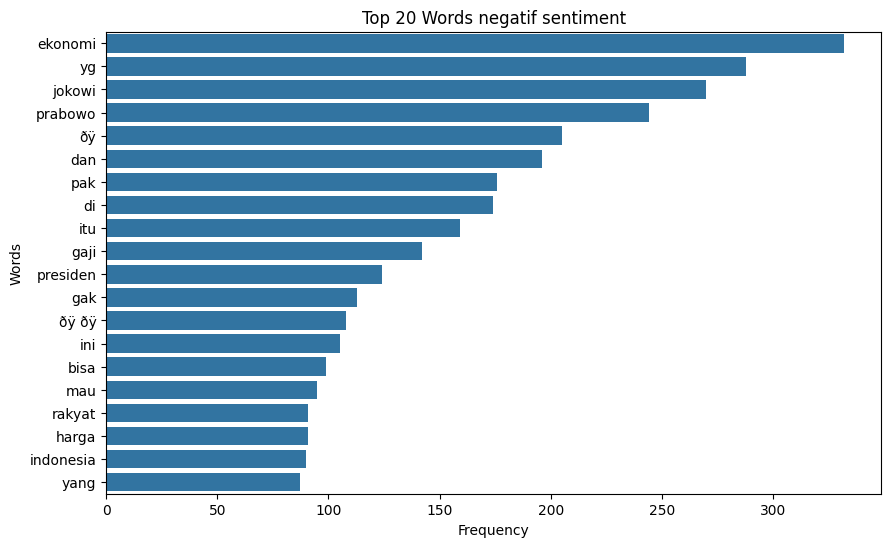

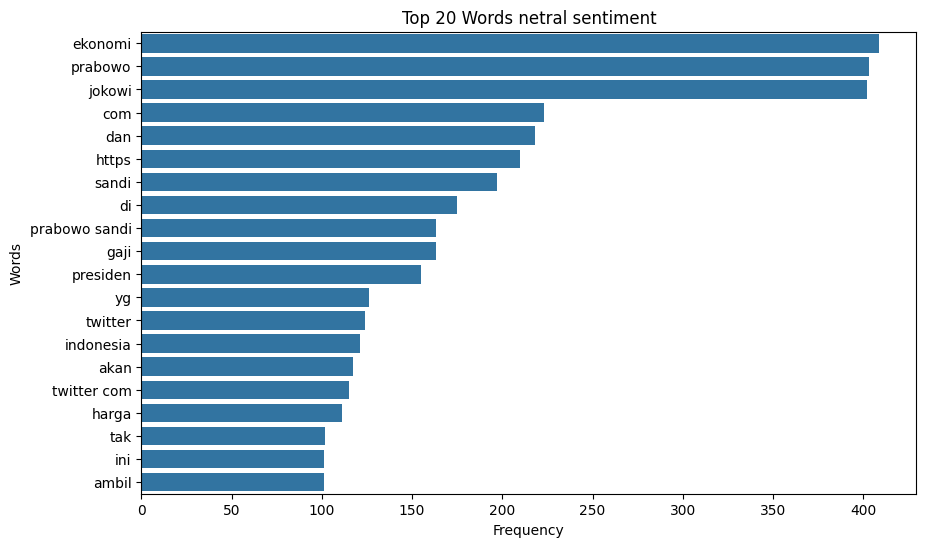

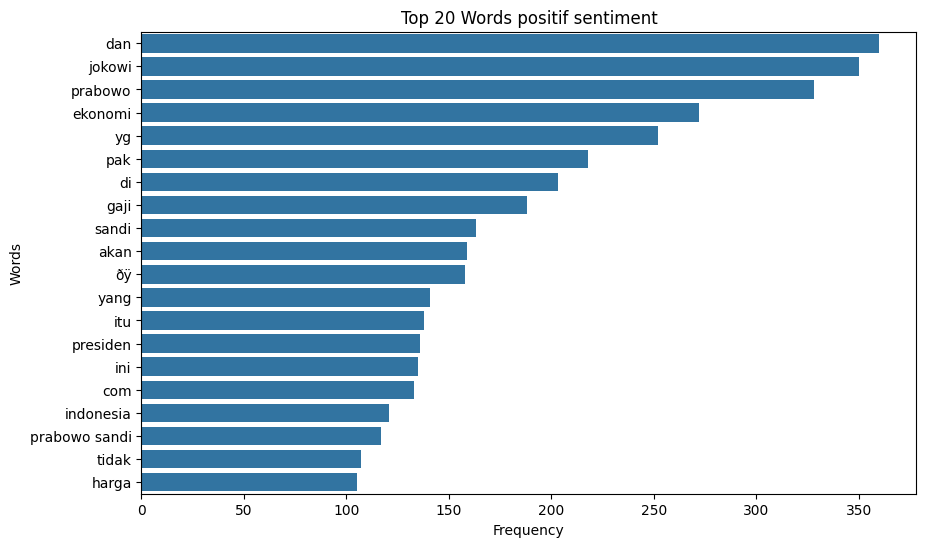

In [12]:
plot_top_words("negatif", df)
plot_top_words("netral", df)
plot_top_words("positif", df)

In [13]:
#hapus stopwords
stop_words = set(stopwords.words("indonesian"))
custom_words = list(stop_words - {"tidak", "bukan", "belum", "gak", "gk", "blm", "tdk", "g"}) #mempertahankan kata sangkalan

def remove_stopwords(text):
  tokens = word_tokenize(text)
  filtered_words = [word for word in tokens if word not in custom_words]
  return " ".join(filtered_words)

c:\Users\daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


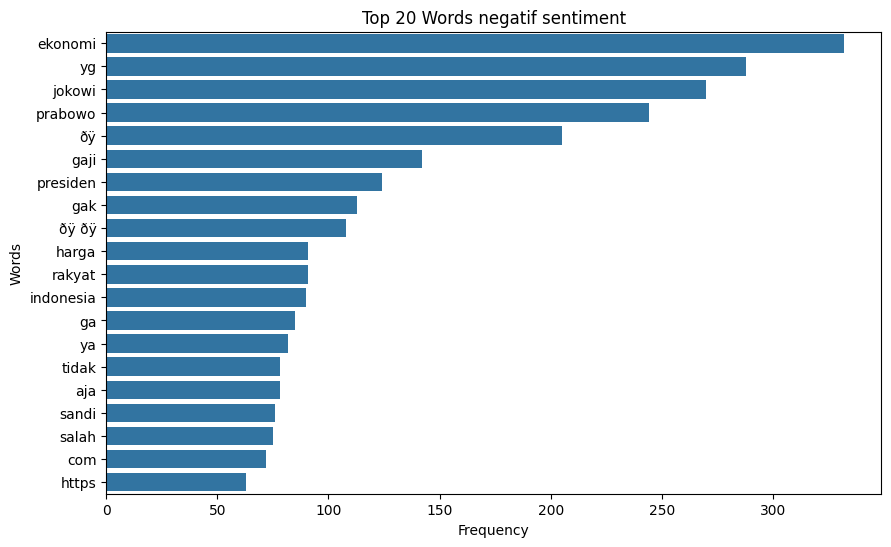

c:\Users\daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


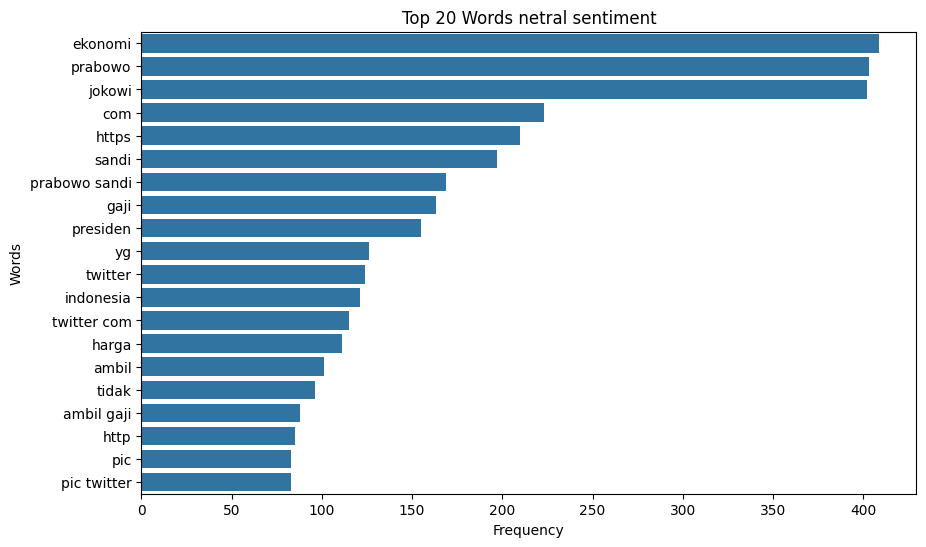

c:\Users\daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


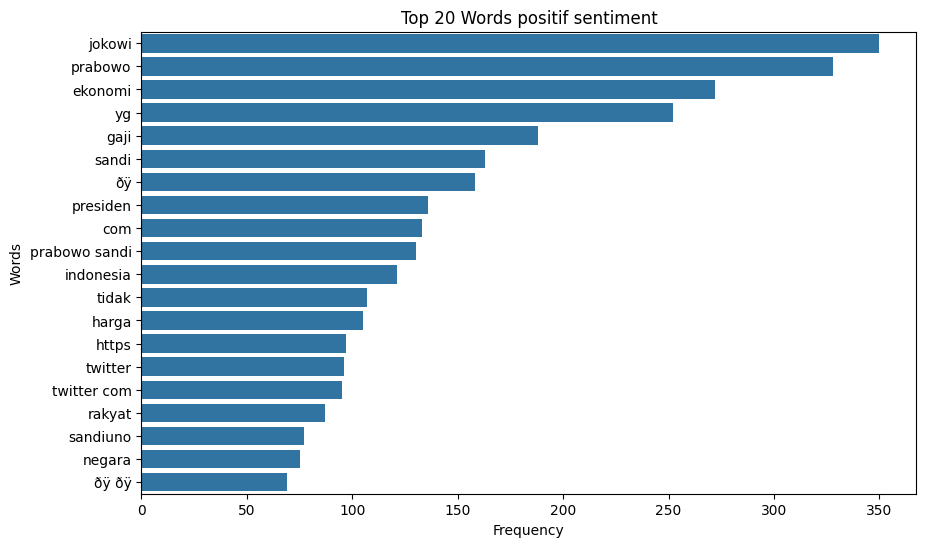

In [14]:
plot_top_words("negatif", df, custom_words)
plot_top_words("netral", df, custom_words)
plot_top_words("positif", df, custom_words)

In [15]:
!pip install Sastrawi


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


###**Proses Stemming**

In [16]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['stemmed'] = df['cleaned'].apply(lambda x: stemmer.stem(x))

In [17]:
df[["tweet", "stemmed"]].head(10)

,tweet,stemmed
0,Kata @prabowo Indonesia tidak dihargai bangsa ...,kata user indonesia tidak harga bangsa asing b...
1,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",batu langka tasbih jokowi hadiah dari habib lu...
2,"Di era Jokowi, ekonomi Indonesia semakin baik....",di era jokowi ekonomi indonesia makin baik 01i...
3,"Bagi Sumatera Selatan, Asian Games berdampak p...",bagi sumatera selatan asi games dampak pd ekon...
4,Negara kita ngutang buat bngun infrastruktur y...,negara kita ngutang buat bngun infrastruktur y...
5,"Yg bisikin pak jokowi, cm mikirin perputaran d...",yg bisikin pak jokowi cm mikirin putar duit di...
6,Masa tenang msih ngoceh aja..ttp jokowi harga ...,masa tenang msih ngoceh aja ttp jokowi harga mati
7,#UASdifitnahKejiBalasDiTPS kerjasa ekonomi b...,uasdifitnahkejibalasditps kerjasa ekonomi bila...
8,"Iya bener Aa, kita MANTAP kan pilihan ke Pemim...",iya bener aa kita mantap kan pilih ke pimpin y...
9,Prabowo-Sandi Sepakat Tak Ambil Gaji karena Ne...,prabowo sandi sepakat tak ambil gaji karena ne...


In [18]:
before = len(set(" ".join(df['cleaned']).split()))
after = len(set(" ".join(df['stemmed']).split()))
print(f"Kata unik sebelum: {before}, sesudah stemming: {after}")

Kata unik sebelum: 7486, sesudah stemming: 5719


In [19]:
#cek kata yg sering muncul

from collections import Counter
Counter(" ".join(df["stemmed"]).split()).most_common(10)

[('ekonomi', 1027),
 ('dan', 749),
 ('user', 711),
 ('prabowo', 708),
 ('jokowi', 680),
 ('yg', 666),
 ('gaji', 549),
 ('di', 530),
 ('url', 481),
 ('pak', 480)]

###**Perbandingan data raw, cleaned, stemmed**

In [20]:
df.sample(5)[["tweet", "cleaned", "stemmed"]]

,tweet,cleaned,stemmed
1749,Mau gaji dokter hewan minimal 10 juta? Tusuk P...,mau gaji dokter hewan minimal juta tusuk prabo...,mau gaji dokter hewan minimal juta tusuk prabo...
728,"Masa Tenang, Sandiaga ke Tanah Suci, Prabowo L...",masa tenang sandiaga ke tanah suci prabowo lak...,masa tenang sandiaga ke tanah suci prabowo lak...
1766,sebenernyaa apa motif pak prabowo dan bang san...,sebenernyaa apa motif pak prabowo dan bang san...,sebenernyaa apa motif pak prabowo dan bang san...
547,"Arah Perekonomian Indonesia Salah, Kata Prabow...",arah perekonomian indonesia salah kata prabowo...,arah ekonomi indonesia salah kata prabowo wart...
62,"He, he, he, pikirkan Letjen pecatan yang bilan...",he he he pikirkan letjen pecatan yang bilang b...,he he he pikir letjen pecat yang bilang biang ...


In [21]:
df["tokens"] = df["stemmed"].apply(lambda x: x.split())

In [22]:
#pos tagging
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier

In [23]:
def read_df(df):
    sentences = df['tweet'].astype(str).tolist()
    tags = df['sentimen'].astype(str).tolist()
    return sentences, tags

sentences, tags = read_df(df)

In [24]:
def features(sentence, index):
    words = sentence.split()  # pecah kalimat jadi token
    return {
        "word": words[index],
        "is_first": index == 0,
        "is_last": index == len(words) - 1,
        "is_capitalized": words[index][0].isupper(),
        "is_all_caps": words[index].isupper(),
        "is_all_lower": words[index].islower(),
        "has_hyphen": "-" in words[index],
        "is_numeric": words[index].isdigit(),
        "prefix-1": words[index][0],
        "prefix-2": words[index][:2],
        "prefix-3": words[index][:3],
        "suffix-1": words[index][-1],
        "suffix-2": words[index][-2:],
        "suffix-3": words[index][-3:],
        "prev_word": "" if index == 0 else words[index - 1],
        "next_word": "" if index == len(words) - 1 else words[index + 1],
}

In [25]:
def transform_to_dataset(sentences, tags):
    X, y = [], []

    for sentence_idx in range(len(sentences)):
        words = sentences[sentence_idx].split()
        # ambil fitur rata-rata kata dalam satu kalimat
        sentence_features = [features(sentences[sentence_idx], i) for i in range(len(words))]
        # gabungkan semua fitur jadi satu dictionary (sederhana)
        combined_features = {f"{i}_{k}": v for i, d in enumerate(sentence_features) for k, v in d.items()}
        X.append(combined_features)
        y.append(tags[sentence_idx])

    return X, y

X, y = transform_to_dataset(sentences, tags)

##**3. Training Data**

##**1. Algoritma Traditional ML: Naive Bayes**

###**Data split: Train & Test**
Vectorizer menggunakan CountVectorizer dan TF-IDF

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

y = df['sentimen'].map({'negatif':0, 'netral':1, 'positif':2})
x_train_raw, x_test_raw, y_train, y_test = train_test_split(df["stemmed"], y, test_size=0.2, random_state=42)

vectorizer_count = CountVectorizer(ngram_range=(1, 2), stop_words=custom_words)

x_train_count = vectorizer_count.fit_transform(x_train_raw)
x_test_count = vectorizer_count.transform(x_test_raw)

c:\Users\daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [27]:
from sklearn.naive_bayes import MultinomialNB

nb_count = MultinomialNB()
nb_count.fit(x_train_count, y_train)
pred_count = nb_count.predict(x_test_count)

vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 2), stop_words=custom_words, min_df=3, max_df=0.9, sublinear_tf=True)
x_train_tfidf = vectorizer_tfidf.fit_transform(x_train_raw)
x_test_tfidf = vectorizer_tfidf.transform(x_test_raw)

nb_tfidf = MultinomialNB()
nb_tfidf.fit(x_train_tfidf, y_train)
pred_tfidf = nb_tfidf.predict(x_test_tfidf)

c:\Users\daffa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [28]:
pd.Series(y_train)

609     2
844     1
300     1
1702    2
614     1
       ..
1130    0
1294    2
860     1
1459    2
1126    0
Name: sentimen, Length: 1452, dtype: int64

In [29]:
pred_count_train = nb_count.predict(x_train_count)
pred_tfidf_train = nb_tfidf.predict(x_train_tfidf)

###**Classification Report Data Train CountVectorizer dan TF-IDF**

In [30]:
from sklearn.metrics import classification_report, accuracy_score

models_train = {
    "CountVectorizer": pred_count_train,
    "TF-IDF": pred_tfidf_train
}

for name, pred in models_train.items():
    print(f"\n-- {name} --")
    print(f"Accuracy: {accuracy_score(y_train, pred):.4f}")
    print(classification_report(y_train, pred, target_names=['negatif', 'netral', 'positif']))


-- CountVectorizer --
Accuracy: 0.9511
              precision    recall  f1-score   support

     negatif       0.97      0.95      0.96       481
      netral       0.93      0.95      0.94       489
     positif       0.95      0.95      0.95       482

    accuracy                           0.95      1452
   macro avg       0.95      0.95      0.95      1452
weighted avg       0.95      0.95      0.95      1452


-- TF-IDF --
Accuracy: 0.7982
              precision    recall  f1-score   support

     negatif       0.75      0.89      0.82       481
      netral       0.83      0.75      0.79       489
     positif       0.83      0.75      0.79       482

    accuracy                           0.80      1452
   macro avg       0.80      0.80      0.80      1452
weighted avg       0.80      0.80      0.80      1452



###**Classification Report Data Test CountVectorizer dan TF-IDF**

In [31]:
#evaluasi modelnya

from sklearn.metrics import classification_report, accuracy_score

models = {
    "CountVectorizer": pred_count,
    "TF-IDF": pred_tfidf
}

for name, pred in models.items():
    print(f"\n-- {name} --")
    print(f"Accuracy: {accuracy_score(y_test, pred):.4f}")
    print(classification_report(y_test, pred, target_names=['negatif', 'netral', 'positif']))



-- CountVectorizer --
Accuracy: 0.6446
              precision    recall  f1-score   support

     negatif       0.63      0.68      0.65       115
      netral       0.70      0.62      0.65       118
     positif       0.62      0.64      0.63       130

    accuracy                           0.64       363
   macro avg       0.65      0.65      0.65       363
weighted avg       0.65      0.64      0.64       363


-- TF-IDF --
Accuracy: 0.6419
              precision    recall  f1-score   support

     negatif       0.59      0.77      0.67       115
      netral       0.69      0.64      0.66       118
     positif       0.66      0.53      0.59       130

    accuracy                           0.64       363
   macro avg       0.65      0.65      0.64       363
weighted avg       0.65      0.64      0.64       363



###**Heatmap - Confusion Matrix**

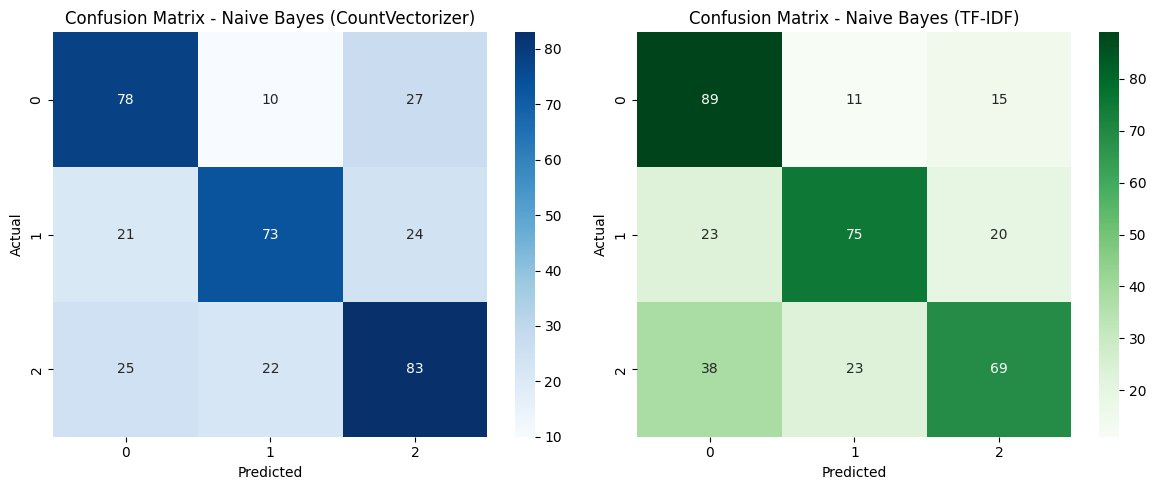

In [32]:
from sklearn.metrics import confusion_matrix

cm_count = confusion_matrix(y_test, pred_count)
cm_tfidf = confusion_matrix(y_test, pred_tfidf)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#Heatmap 1: CountVectorizer
sns.heatmap(cm_count, annot=True, fmt='d', cmap='Blues',
            xticklabels=nb_count.classes_, yticklabels=nb_count.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix - Naive Bayes (CountVectorizer)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

#Heatmap 2: TF-IDF
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Greens',
            xticklabels=nb_tfidf.classes_, yticklabels=nb_tfidf.classes_, ax=axes[1])
axes[1].set_title('Confusion Matrix - Naive Bayes (TF-IDF)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

##**2. Algoritma NN/ DL: LSTM**


In [33]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.regularizers import l2, Regularizer
from sklearn.metrics import accuracy_score, classification_report
from keras.layers import BatchNormalization

labels = df['sentimen'].map({'negatif': 0, 'netral': 1, 'positif': 2}).values

#split data - use the 'labels' variable which contains integer mappings
stemmed_text = df['stemmed'].astype(str).values

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(stemmed_text)

#ubah teks jadi sequences
sequences = tokenizer.texts_to_sequences(stemmed_text)

#padding
padded = pad_sequences(sequences, maxlen=100)

x_raw_train, x_raw_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [34]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32))
model.add(Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.build(input_shape=(None, 100))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 180,995 (707.01 KB)

 Trainable params: 180,995 (707.01 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#konversi numpy arrays of type integer
y_train = np.array(y_train, dtype=int)
y_test = np.array(y_test, dtype=int)

history_embed = model.fit(x_raw_train, y_train, epochs=15, batch_size=16, validation_data=(x_raw_test, y_test), callbacks=[early_stop])

y_pred_train = model.predict(x_raw_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train_classes))
print("\nTrain Classification Report:\n", classification_report(y_train, y_pred_train_classes, target_names=['negatif', 'netral', 'positif']))
#evaluasi-1
y_pred = model.predict(x_raw_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=['negatif', 'netral', 'positif']))

Epoch 1/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.3368 - loss: 1.0969 - val_accuracy: 0.3967 - val_loss: 1.0866
Epoch 2/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.4683 - loss: 1.0346 - val_accuracy: 0.5096 - val_loss: 0.9668
Epoch 3/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5785 - loss: 0.9209 - val_accuracy: 0.5399 - val_loss: 0.9310
Epoch 4/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.6605 - loss: 0.8175 - val_accuracy: 0.5675 - val_loss: 0.9122
Epoch 5/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7369 - loss: 0.6757 - val_accuracy: 0.5950 - val_loss: 0.9047
Epoch 6/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7741 - loss: 0.5704 - val_accuracy: 0.5840 - val_loss: 0.9586
Epoch 7/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.8402 - loss: 0.4572 - val_accuracy: 0.5482 - val_loss: 1.0117
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Train Accuracy: 0.8484848484848485

Train Classification Report:
      

###**Iterasi: Tambah embedding menggunakan Word2Vec**

In [36]:
import gensim
from gensim.models import Word2Vec

sentences = [text.split() for text in df['stemmed']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

modelW2v = Sequential()
modelW2v.add(Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=True))
modelW2v.add(Bidirectional(LSTM(32, dropout=0.5, recurrent_dropout=0.5)))
modelW2v.add(Dense(64, activation='relu'))
modelW2v.add(Dropout(0.5))
modelW2v.add(Dense(3, activation='softmax'))
modelW2v.build(input_shape=(None, x_raw_train.shape[1]))
modelW2v.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 100)       │       572,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        34,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 610,403 (2.33 MB)

 Trainable params: 610,403 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
modelW2v.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history_w2v = modelW2v.fit(x_raw_train, y_train, epochs=15, batch_size=16, validation_data=(x_raw_test, y_test), callbacks=[early_stop], verbose=1)

y_pred_train = modelW2v.predict(x_raw_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train_classes))
print("\nTrain Classification Report:\n", classification_report(y_train, y_pred_train_classes, target_names=['negatif', 'netral', 'positif']))

#evaluasi-2
y_pred = modelW2v.predict(x_raw_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes, target_names=['negatif', 'netral', 'positif']))

Epoch 1/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.3368 - loss: 1.1061 - val_accuracy: 0.4050 - val_loss: 1.0919
Epoch 2/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3409 - loss: 1.0993 - val_accuracy: 0.3719 - val_loss: 1.0778
Epoch 3/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.3974 - loss: 1.0854 - val_accuracy: 0.4490 - val_loss: 1.0575
Epoch 4/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.4442 - loss: 1.0642 - val_accuracy: 0.4656 - val_loss: 1.0363
Epoch 5/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5000 - loss: 1.0065 - val_accuracy: 0.5344 - val_loss: 0.9969
Epoch 6/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.5730 - loss: 0.9312 - val_accuracy: 0.5317 - val_loss: 0.9536
Epoch 7/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.6426 - loss: 0.7945 - val_accuracy: 0.5647 - val_loss: 0.9256
Epoch 8/15
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7369 - loss: 0.6571 - val_accuracy: 0.5510 - v

###**Visualisasi Grafik Accuracy & Loss LSTM**

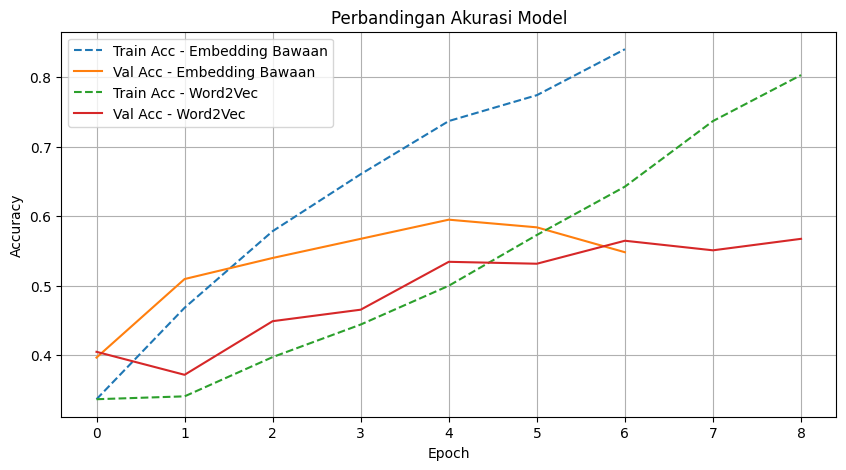

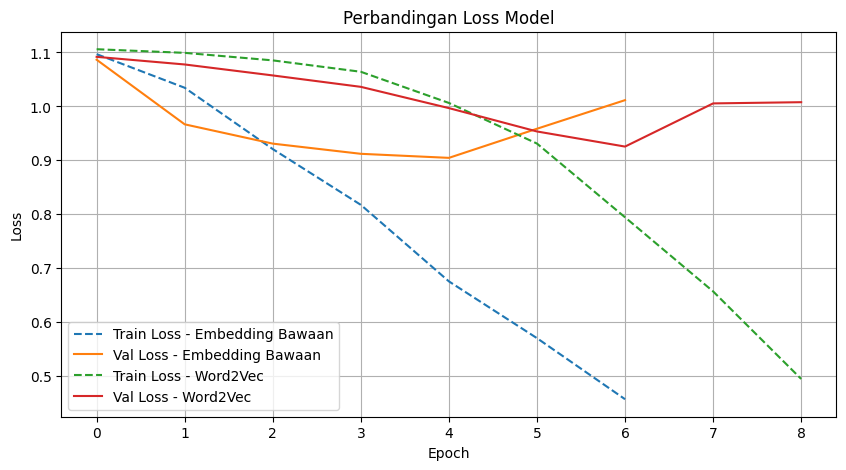

In [38]:
#visualisasi accuracy & loss
#Accuracy
plt.figure(figsize=(10,5))
plt.plot(history_embed.history['accuracy'], label='Train Acc - Embedding Bawaan', linestyle='--')
plt.plot(history_embed.history['val_accuracy'], label='Val Acc - Embedding Bawaan')
plt.plot(history_w2v.history['accuracy'], label='Train Acc - Word2Vec', linestyle='--')
plt.plot(history_w2v.history['val_accuracy'], label='Val Acc - Word2Vec')

plt.title('Perbandingan Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#Loss
plt.figure(figsize=(10,5))
plt.plot(history_embed.history['loss'], label='Train Loss - Embedding Bawaan', linestyle='--')
plt.plot(history_embed.history['val_loss'], label='Val Loss - Embedding Bawaan')
plt.plot(history_w2v.history['loss'], label='Train Loss - Word2Vec', linestyle='--')
plt.plot(history_w2v.history['val_loss'], label='Val Loss - Word2Vec')

plt.title('Perbandingan Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
#Testing model prediction for user input text (By Daffa)
def predict_sentiments(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100)
    pred = modelW2v.predict(padded_seq)[0][0]
    if pred > 0.6:
        return f"Sentimen Positif, Hasil Prediksi: {pred}"
    elif pred < 0.5:
        return f"Sentimen Negatif, Hasil Prediksi: {pred}"
    else:
        return f"Sentimen Netral, Hasil Prediksi: {pred}"

In [40]:
def predict_sentiments_nonw2v(text):
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=100)
    pred = model.predict(padded_seq)[0][0]
    if pred > 0.6:
        return f"Sentimen Positif, Hasil Prediksi: {pred}"
    elif pred < 0.5:
        return f"Sentimen Negatif, Hasil Prediksi: {pred}"
    else:
        return f"Sentimen Netral, Hasil Prediksi: {pred}"

In [ ]:
while True:
    user_input = input("\nEnter a tweet (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    print(f"Text from user: {user_input}")
    print(f"Predicted Sentiment: {predict_sentiments(user_input)}")
    print(f"Predicted Sentiment: {predict_sentiments_nonw2v(user_input)}")